In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

In [2]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto': ['.ipynb_checkpoints', 'ABOD anomaly detection.pdf', 'all classes anomalies.pdf', 'anamoalies of the class.pdf', 'Anomaly detection.ipynb', 'best_X_test_con_nome1.txt', 'best_X_test_w6.csv', 'best_X_train_con_nomi.csv', 'best_X_train_w6.csv', 'confu 2 classi.pdf', 'confusion matrix 23 w6.pdf', 'confusion matrix 540 w6.pdf', 'DBSCAN anomaly detection1.pdf', 'Dimensionality Reduction.ipynb', 'dtc_multiclass_roc 23 features.pdf', 'EDA.ipynb', 'EX Iso anomaly detection.pdf', 'Iso anomaly detection.pdf', 'KNN anomaly detection.pdf', 'Linear Regression .ipynb', 'LOF anomaly detection.pdf', 'Naive Bayes Classifier.ipynb', 'Pre Processing .ipynb', 'precisi recall w6 23 features.pdf', 'precision recall 540 w6.pdf', 'UCI HAR Dataset', 'X_test_540attr_w_nomi.csv', 'X_test_fs.txt', 'X_test_fs_cleaned.txt', 'X_test_wo_outliers_540attr_w6.csv', 'X_train_fs.txt', 'X_train_fs_cleaned.txt'

In [3]:
X_train = pd.read_csv("C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\\best_X_train_w6.csv", index_col=0)
X_test = pd.read_csv("C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\\best_X_test_w6.csv",  index_col=0)
y_train= pd.read_csv("C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\\y_train_w6.csv",  index_col=0)
y_test= pd.read_csv("C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\\y_test_w6.csv",  index_col=0)

In [4]:
X_train.columns.tolist()

['tBodyAcc-correlation()-X,Y',
 'tGravityAcc-mean()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,4',
 'tBodyGyro-max()-X',
 'tBodyGyro-min()-X',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyAccMag-arCoeff()1',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyGyro-maxInds-X',
 'fBodyGyro-maxInds-Z',
 'fBodyAccMag-std()',
 'fBodyAccMag-energy()',
 'angle(Y,gravityMean)']

# Linear regression

Select two continuous attributes, define a simple linear univariate regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies. Solve it using linear regressions, regularized linear regressions (such as Lasso and Ridge) but also machine learning approaches such as Gradient Boosting Machines.



## Linear relationship 

We proceed filterng the records by group of class: 
* Simple Linear regression for stationary activities;
* Simple Linear regression for dynamic activities.

In [5]:
X_train['Activity']= y_train
X_train

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity
0,0.376314,0.963396,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.970905,-0.591773,-0.712372,...,0.301099,-0.173179,-0.999963,-0.999981,-1.000000,-1.000000,-0.956134,-0.998285,0.179941,5
1,-0.013429,0.966561,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.970583,-0.417567,-0.105568,...,0.169395,0.081569,-0.999996,-0.999974,-1.000000,-1.000000,-0.975866,-0.999472,0.180289,5
2,-0.124698,0.966878,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.970368,-0.056728,-0.254490,...,-0.350646,0.038049,-0.999989,-0.999909,-1.000000,-1.000000,-0.989015,-0.999807,0.180637,5
3,-0.305693,0.967615,-0.163711,0.093425,0.986821,-0.121336,0.095753,-0.969400,-0.085823,-0.206281,...,-0.725301,-0.092856,-0.999989,-0.999927,-1.000000,-0.793103,-0.986742,-0.999770,0.181935,5
4,-0.155804,0.968224,-0.166786,0.091682,0.987434,-0.121834,0.094059,-0.967051,-0.280665,-0.066327,...,-0.724558,0.180441,-0.999994,-0.999975,-1.000000,-1.000000,-0.990063,-0.999873,0.185151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,0.337338,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604,2
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,0.406319,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676,2
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,0.483839,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145,2
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,0.376823,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432,2


In [6]:
# 1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'

X_train['newActivity']= None

for index in range(X_train.shape[0]):
    if X_train['Activity'].iloc[index] == 1 or X_train['Activity'].iloc[index] == 2 or X_train['Activity'].iloc[index] == 3:
        X_train['newActivity'].iloc[index] = 'Dynamic'
    else:
        X_train['newActivity'].iloc[index] = 'Stationary'
    
    
X_train

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity,newActivity
0,0.376314,0.963396,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.970905,-0.591773,-0.712372,...,-0.173179,-0.999963,-0.999981,-1.000000,-1.000000,-0.956134,-0.998285,0.179941,5,Stationary
1,-0.013429,0.966561,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.970583,-0.417567,-0.105568,...,0.081569,-0.999996,-0.999974,-1.000000,-1.000000,-0.975866,-0.999472,0.180289,5,Stationary
2,-0.124698,0.966878,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.970368,-0.056728,-0.254490,...,0.038049,-0.999989,-0.999909,-1.000000,-1.000000,-0.989015,-0.999807,0.180637,5,Stationary
3,-0.305693,0.967615,-0.163711,0.093425,0.986821,-0.121336,0.095753,-0.969400,-0.085823,-0.206281,...,-0.092856,-0.999989,-0.999927,-1.000000,-0.793103,-0.986742,-0.999770,0.181935,5,Stationary
4,-0.155804,0.968224,-0.166786,0.091682,0.987434,-0.121834,0.094059,-0.967051,-0.280665,-0.066327,...,0.180441,-0.999994,-0.999975,-1.000000,-1.000000,-0.990063,-0.999873,0.185151,5,Stationary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604,2,Dynamic
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676,2,Dynamic
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145,2,Dynamic
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432,2,Dynamic


In [7]:
y_train= X_train[['newActivity']]
X_train.drop(columns= 'Activity', inplace=True)

In [8]:
X_train_stat= X_train[X_train['newActivity']== 'Stationary'].iloc[:,:-1]
X_train_dynam= X_train[X_train['newActivity']== 'Dynamic'] #.iloc[:,:-1]

In [9]:
X_train_dynam

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",newActivity
76,-0.124846,0.945303,-0.252564,-0.024167,0.960748,-0.248151,-0.047727,-0.899488,-0.496502,-0.223489,...,0.032063,0.071634,-0.843750,-0.640757,-1.000000,-0.586207,-0.399583,-0.704874,0.252432,Dynamic
77,-0.212158,0.941113,-0.252564,-0.031452,0.953407,-0.243722,-0.047727,-0.893938,-0.501882,-0.226374,...,0.146326,0.046101,-0.755835,-0.573368,-0.266667,-0.586207,-0.423030,-0.685753,0.256919,Dynamic
78,-0.187704,0.946364,-0.270062,-0.027424,0.953407,-0.244126,-0.031594,-0.882935,-0.603038,-0.232804,...,0.165790,0.139416,-0.755803,-0.690235,-0.933333,-0.586207,-0.436858,-0.719660,0.264452,Dynamic
79,-0.195782,0.952445,-0.273255,-0.027424,0.962737,-0.244126,-0.033284,-0.887160,-0.548903,-0.263108,...,0.091175,0.089021,-0.733221,-0.622762,-0.266667,-0.586207,-0.376215,-0.671153,0.260850,Dynamic
80,-0.224966,0.947125,-0.273595,-0.027034,0.960761,-0.230658,-0.033284,-0.889778,-0.544039,-0.176861,...,0.094166,-0.013518,-0.704614,-0.668420,-0.266667,-0.586207,-0.387860,-0.683914,0.259629,Dynamic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,0.337338,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604,Dynamic
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,0.406319,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676,Dynamic
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,0.483839,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145,Dynamic
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,0.376823,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432,Dynamic


# Simpler linear regression for the class stationary. 

<AxesSubplot:>

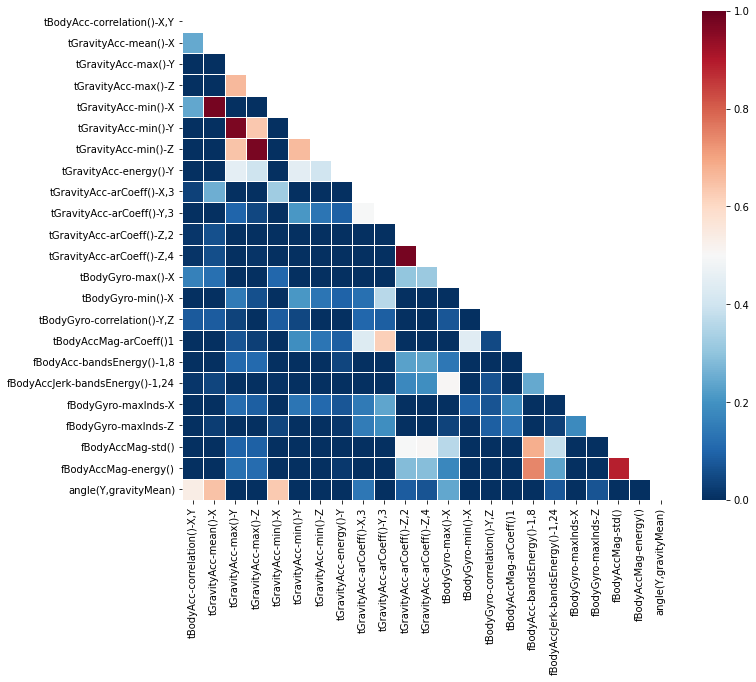

In [10]:
#I will take in account the Pearson correlation to select the features

corr = X_train_stat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=0, vmax=1, 
            square=True, linewidths=.5)

### First linear model regression: features with high correlation

<AxesSubplot:>

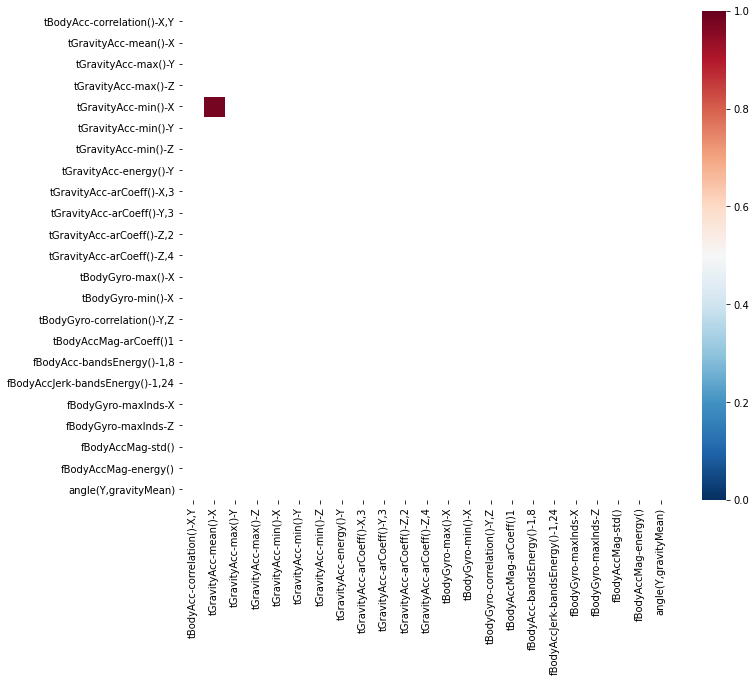

In [11]:
corr = X_train_stat.corr()
kot= corr[corr >= .98]
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(kot, mask=mask, cmap='RdBu_r', vmin=0, vmax=1, 
            square=True, linewidths=.5)

For our analysis we choose the features most correlated:
* The features 'tGravityAcc-min()-X' and 'tGravityAcc-mean()-X'

The indipendent variable is 'tGravityAcc-min()-X', while the dipendent the other.

Text(0.5, 0, 'tGravityAcc-min()-X')

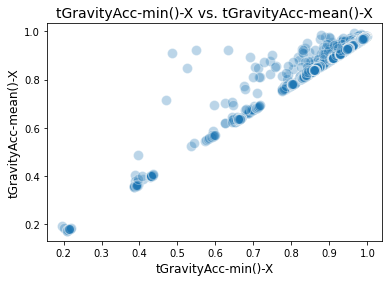

In [12]:
from sklearn.linear_model import LinearRegression

dep_var= 'tGravityAcc-mean()-X'
ind_var= 'tGravityAcc-min()-X'


plt.scatter(y = dep_var, x = ind_var, data = X_train_stat, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('tGravityAcc-min()-X vs. tGravityAcc-mean()-X', fontsize = 14)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var, fontsize = 12)

### SLR model with Ordinary Least Square


First, we’ll build the model using the statsmodel package. To do that, we need to import the statsmodel.api library to perform linear regression.
By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mX, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.

In [13]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm


y_dep_var= X_train_stat['tGravityAcc-mean()-X']
x_ind_var= X_train_stat['tGravityAcc-min()-X']

In [14]:
#pip install termcolor

In [15]:
#🐑 Fitting the regression line using 'OLS'
# Ordinary Least Square
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
slr_model = sm.OLS(y_dep_var,x_ind_var)
slr_reg = slr_model.fit()

# Performing a summary to list out all the different parameters of the regression line fitted
from termcolor import colored as cl

print(cl(slr_reg.summary(),attrs = ['bold']) )

NameError: name 'spector_data' is not defined

### SLR model with Scikit-learn


In [16]:
#Function to get cross validation score R2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def get_cv_scores(model,X_train,y_train):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=3,
                             scoring='r2')
    
    print('(R2): ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [17]:
X_test['Activity']= y_test
X_test

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity
0,0.076989,0.936489,-0.279244,0.152895,0.944461,-0.262160,-0.076162,-0.864621,-0.431839,-0.780391,...,-0.301735,0.053780,-0.998506,-0.996894,-1.000000,-0.931034,-0.711074,-0.953984,0.276801,5
1,-0.104983,0.927404,-0.304870,0.152895,0.944461,-0.262160,0.149013,-0.858163,-0.540245,-0.737390,...,-0.533962,0.458489,-0.999850,-0.999197,-1.000000,-0.931034,-0.959746,-0.998476,0.281343,5
2,0.305653,0.929915,-0.304870,0.139454,0.948704,-0.261661,0.144969,-0.859947,-0.315239,-0.155203,...,-0.730050,0.141732,-0.999976,-0.999932,-1.000000,-1.000000,-0.983784,-0.999570,0.280083,5
3,-0.063792,0.928881,-0.305101,0.136124,0.947309,-0.272916,0.142107,-0.853713,-0.375191,-0.169368,...,-0.891736,0.131086,-0.999983,-0.999918,-1.000000,-1.000000,-0.982120,-0.999504,0.284114,5
4,0.235151,0.926600,-0.312552,0.133541,0.946221,-0.279190,0.130931,-0.843378,-0.596321,-0.465463,...,-0.918319,-0.075711,-0.999961,-0.999935,-1.000000,-0.931034,-0.978838,-0.999500,0.290722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.258908,0.890968,-0.278442,0.226640,0.903413,-0.272203,-0.243507,-0.870515,-0.560114,-0.716222,...,0.340033,-0.350785,-0.734651,-0.811454,-1.000000,-0.931034,-0.332141,-0.702110,0.274627,2
2943,-0.249325,0.891281,-0.278442,0.220590,0.903793,-0.268172,-0.243507,-0.872342,-0.583433,-0.538037,...,0.272670,-0.374953,-0.747251,-0.794895,-1.000000,-0.931034,-0.316954,-0.674032,0.273578,2
2944,-0.351080,0.890897,-0.273818,0.220590,0.903793,-0.268172,-0.245178,-0.871197,-0.598919,-0.559421,...,0.236729,-0.469371,-0.762837,-0.807419,-1.000000,-0.931034,-0.377240,-0.715711,0.274479,2
2945,-0.190791,0.892736,-0.272785,0.231517,0.909007,-0.244744,-0.245178,-0.884788,-0.466692,-0.670957,...,0.185292,-0.279848,-0.751525,-0.839262,-0.933333,-0.931034,-0.390201,-0.745225,0.264782,2


In [18]:
X_test['newActivity']= None

for index in range(X_test.shape[0]):
    if X_test['Activity'].iloc[index] == 1 or X_test['Activity'].iloc[index] == 2 or X_test['Activity'].iloc[index] == 3:
        X_test['newActivity'].iloc[index] = 'Dynamic'
    else:
        X_test['newActivity'].iloc[index] = 'Stationary'


In [19]:
X_test.drop(columns= 'Activity', inplace=True)

In [20]:
X_test_stat= X_test[X_test['newActivity']== 'Stationary'].iloc[:,:-1]
X_test_dynam= X_test[X_test['newActivity']== 'Dynamic'] #iloc[:,:-1]
X_test_stat

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,tBodyGyro-min()-X,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)"
0,0.076989,0.936489,-0.279244,0.152895,0.944461,-0.262160,-0.076162,-0.864621,-0.431839,-0.780391,...,0.837100,-0.301735,0.053780,-0.998506,-0.996894,-1.000000,-0.931034,-0.711074,-0.953984,0.276801
1,-0.104983,0.927404,-0.304870,0.152895,0.944461,-0.262160,0.149013,-0.858163,-0.540245,-0.737390,...,0.823033,-0.533962,0.458489,-0.999850,-0.999197,-1.000000,-0.931034,-0.959746,-0.998476,0.281343
2,0.305653,0.929915,-0.304870,0.139454,0.948704,-0.261661,0.144969,-0.859947,-0.315239,-0.155203,...,0.823033,-0.730050,0.141732,-0.999976,-0.999932,-1.000000,-1.000000,-0.983784,-0.999570,0.280083
3,-0.063792,0.928881,-0.305101,0.136124,0.947309,-0.272916,0.142107,-0.853713,-0.375191,-0.169368,...,0.816059,-0.891736,0.131086,-0.999983,-0.999918,-1.000000,-1.000000,-0.982120,-0.999504,0.284114
4,0.235151,0.926600,-0.312552,0.133541,0.946221,-0.279190,0.130931,-0.843378,-0.596321,-0.465463,...,0.816059,-0.918319,-0.075711,-0.999961,-0.999935,-1.000000,-0.931034,-0.978838,-0.999500,0.290722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,-0.221162,0.965387,0.061706,0.021911,0.985061,0.112020,0.028280,-0.977690,-0.232879,-0.330661,...,0.841756,-0.277501,0.052947,-0.999982,-0.999833,-0.533333,-0.931034,-0.989759,-0.999809,0.022649
2819,-0.434196,0.965271,0.063288,0.024618,0.983929,0.115764,0.028255,-0.976946,-0.308759,-0.247643,...,0.840812,-0.316918,-0.132341,-0.999989,-0.999932,-0.666667,-1.000000,-0.989944,-0.999865,0.021422
2820,-0.384121,0.964233,0.066655,0.030727,0.983404,0.116080,0.028255,-0.975969,-0.253954,-0.190789,...,0.840812,-0.227358,0.080993,-0.999983,-0.999936,-0.666667,-0.931034,-0.986520,-0.999789,0.019837
2821,-0.316014,0.964589,0.066655,0.030727,0.983404,0.112844,0.036714,-0.975715,-0.305820,-0.552366,...,0.842904,-0.044530,0.069242,-0.999987,-0.999896,-0.933333,-1.000000,-0.981020,-0.999588,0.019470


In [21]:
y_test_stat= X_test[['newActivity']]

y_test_stat

,newActivity
0,Stationary
1,Stationary
2,Stationary
3,Stationary
4,Stationary
...,...
2942,Dynamic
2943,Dynamic
2944,Dynamic
2945,Dynamic


In [22]:
y_dep_test_var= X_test_stat['tGravityAcc-mean()-X']
x_ind_test_var= X_test_stat['tGravityAcc-min()-X']

In [23]:
np.array(y_dep_var).reshape(-1,1)

array([[0.96339614],
       [0.96656113],
       [0.9668781 ],
       ...,
       [0.92738316],
       [0.92642789],
       [0.92663857]])

In [24]:
# build the model
slr = LinearRegression()
slr.fit(np.array(x_ind_var).reshape(-1,1),np.array(y_dep_var).reshape(-1,1))
y_pred = slr.predict(np.array(x_ind_test_var).reshape(-1,1))

In [25]:
#Evaluations
print("***Cross Validation R2 score - Training Data***")
get_cv_scores(slr, np.array(x_ind_var).reshape(-1,1), np.array(y_dep_var).reshape(-1,1)) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_dep_test_var, y_pred))
print('MSE: %.3f' % mean_squared_error(y_dep_test_var, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_dep_test_var, y_pred))

***Cross Validation R2 score - Training Data***
(R2):  0.9347929901255959
STD:  0.06054651236065828


***Scores (no cv) on Test Data***
R2: 0.922
MSE: 0.000
MAE: 0.007


In [27]:
r = slr.score(np.array(x_ind_var).reshape(-1,1), np.array(y_dep_var).reshape(-1,1))
print('coefficient of determination - R^2:', r)
intercept111= slr.intercept_
print('intercept:', slr.intercept_)   #la retta incrocia l'asse y
slope111= slr.coef_
print('slope:', slr.coef_)  #pendenza della retta di regressione stimata


coefficient of determination - R^2: 0.961313223383652
intercept: [0.01491278]
slope: [[0.96731282]]


In [28]:
#Compute hypotesis weight and bias

# Y = wX+B where X= 'tGravityAcc-mean()-X' and Y='tGravityAcc-min()-X'
slr_slope = slr.coef_ # weight: w
slr_intercept = slr.intercept_ # bias B
print('Coefficients: \n', slr_slope)
print('Intercept: \n', slr_intercept)

Coefficients: 
 [[0.96731282]]
Intercept: 
 [0.01491278]


In [29]:
slr_slope*X_train_stat[[ind_var]]

,tGravityAcc-min()-X
0,0.945487
1,0.952339
2,0.954515
3,0.954565
4,0.955157
...,...
7147,0.918894
7148,0.917287
7149,0.915809
7150,0.915805


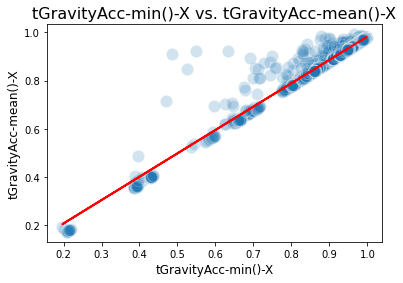

In [84]:
sns.scatterplot(x = ind_var, y = dep_var, data = X_train_stat , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_train_stat[ind_var], slr_slope*X_train_stat[[ind_var]] + slr_intercept, color = 'r', linewidth = 2)
plt.title('tGravityAcc-min()-X vs. tGravityAcc-mean()-X', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var, fontsize = 12)
plt.savefig('linear regression lineare.pdf', bbox_inches = 'tight')

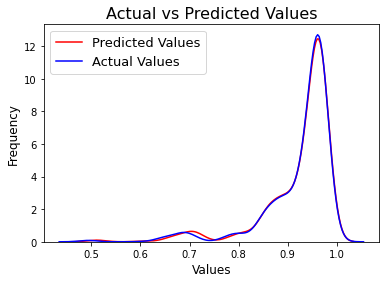

In [31]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_dep_test_var, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# Simpler linear regression for the class dynamic. 

### SLR model with Ordinary Least Square


<AxesSubplot:>

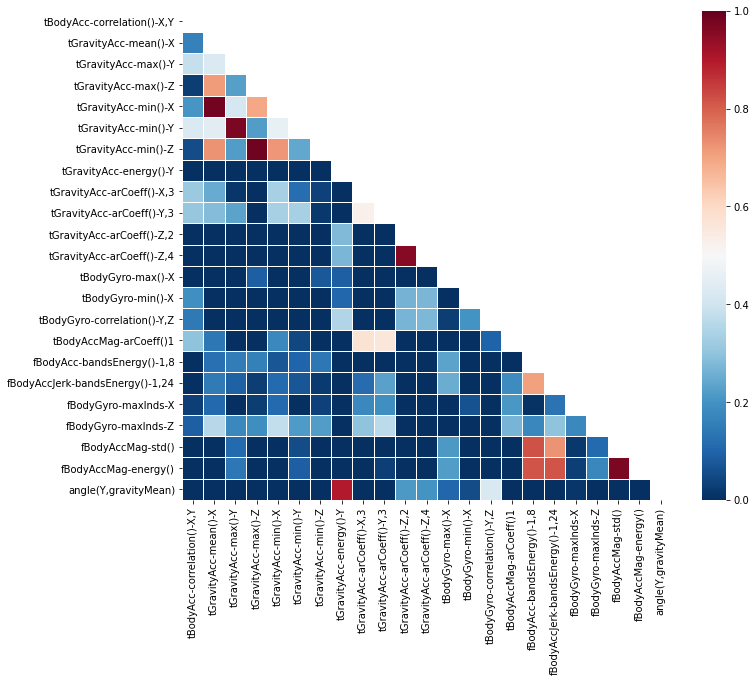

In [32]:
corr = X_train_dynam.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=0, vmax=1, 
            square=True, linewidths=.5)

<AxesSubplot:>

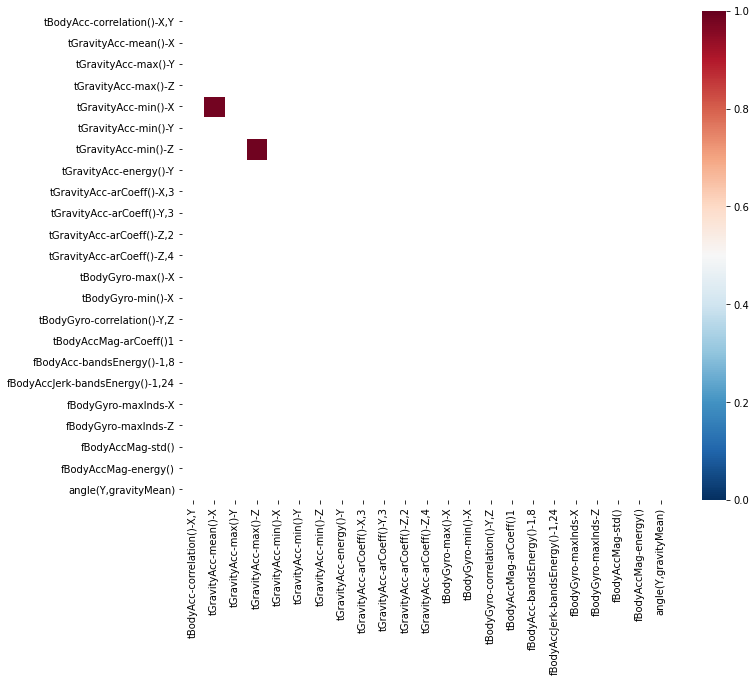

In [33]:
corr = X_train_dynam.corr()
kot= corr[corr >= .98]
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(kot, mask=mask, cmap='RdBu_r', vmin=0, vmax=1, 
            square=True, linewidths=.5)

In [34]:
y_dep_var_dy= X_train_dynam['tGravityAcc-mean()-X']
x_ind_var_dy= X_train_dynam['tGravityAcc-min()-X']

Text(0.5, 0, 'tGravityAcc-min()-X')

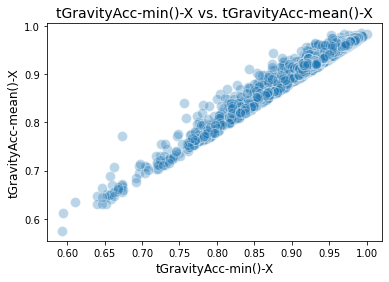

In [35]:
plt.scatter(y = dep_var, x = ind_var, data = X_train_dynam, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('tGravityAcc-min()-X vs. tGravityAcc-mean()-X', fontsize = 14)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var, fontsize = 12)

In [36]:
slr_model_dy = sm.OLS(y_dep_var_dy, x_ind_var_dy)
slr_reg_dy = slr_model_dy.fit()

print(cl(slr_reg_dy.summary(),attrs = ['bold']) )

NameError: name 'cl' is not defined

### SLR model with Scikit-learn

In [ ]:
y_dep_test_var_dy= X_test_dynam['tGravityAcc-mean()-X']
x_ind_test_var_dy= X_test_dynam['tGravityAcc-min()-X']

In [ ]:
slr_dy = LinearRegression()
slr_dy.fit(np.array(x_ind_var_dy).reshape(-1,1),np.array(y_dep_var_dy).reshape(-1,1))
y_pred_dy = slr_dy.predict(np.array(x_ind_test_var_dy).reshape(-1,1))

In [ ]:
print("***Cross Validation R2 score - Training Data***")
get_cv_scores(slr_dy, np.array(x_ind_var_dy).reshape(-1,1), np.array(y_dep_var_dy).reshape(-1,1)) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_dep_test_var_dy, y_pred_dy))
print('MSE: %.3f' % mean_squared_error(y_dep_test_var_dy, y_pred_dy))
print('MAE: %.3f' % mean_absolute_error(y_dep_test_var_dy, y_pred_dy))

In [37]:
#Compute hypotesis weight and bias

# Y = wX+B where X= 'tGravityAcc-mean()-X' and Y='tGravityAcc-min()-X'
slr_slope_dy = slr_dy.coef_ # weight: w
slr_intercept_dy = slr_dy.intercept_ # bias B
print('Coefficients: \n', slr_slope_dy)
print('Intercept: \n', slr_intercept_dy)

NameError: name 'slr_dy' is not defined

NameError: name 'slr_slope_dy' is not defined

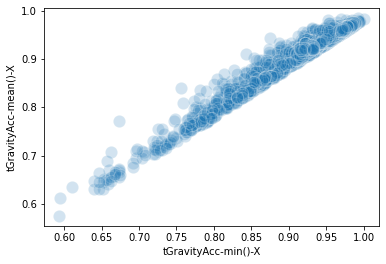

In [38]:
sns.scatterplot(x = ind_var, y = dep_var, data = X_train_dynam , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_train_dynam[ind_var], slr_slope_dy*X_train_dynam[[ind_var]] + slr_intercept_dy, color = 'r', linewidth = 2)
plt.title('tGravityAcc-min()-X vs. tGravityAcc-mean()-X', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var, fontsize = 12)

In [ ]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred_dy, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_dep_test_var_dy, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### Simple linear regression with the same dipendent variable, changing the independent.

### Stationary

<AxesSubplot:>

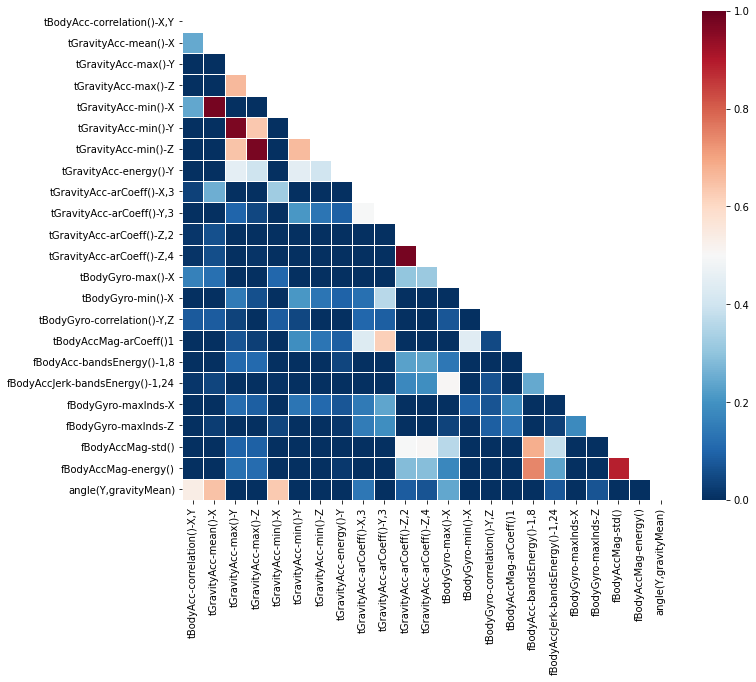

In [39]:
corr = X_train_stat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=0, vmax=1, 
            square=True, linewidths=.5)

We take the attribute 'angle(Y,gravityMean)' with correlation of 64%

In [40]:
X_train_stat.columns.tolist()

['tBodyAcc-correlation()-X,Y',
 'tGravityAcc-mean()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,4',
 'tBodyGyro-max()-X',
 'tBodyGyro-min()-X',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyAccMag-arCoeff()1',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyGyro-maxInds-X',
 'fBodyGyro-maxInds-Z',
 'fBodyAccMag-std()',
 'fBodyAccMag-energy()',
 'angle(Y,gravityMean)']

In [41]:
#dep_var= 'tGravityAcc-mean()-X'
ind_var1= 'angle(Y,gravityMean)'
ind_var2= 'tGravityAcc-arCoeff()-X,3'

In [42]:
#y_dep_var= X_train_stat['tGravityAcc-mean()-X']
x_ind_var1= X_train_stat['angle(Y,gravityMean)']
x_ind_var1

0       0.179941
1       0.180289
2       0.180637
3       0.181935
4       0.185151
          ...   
7147    0.074984
7148    0.079120
7149    0.081037
7150    0.080048
7151    0.080114
Name: angle(Y,gravityMean), Length: 2650, dtype: float64

In [43]:
model1 = sm.OLS(y_dep_var,x_ind_var1)
model_reg1 = model1.fit()

print(cl(model_reg1.summary(),attrs = ['bold']) )

NameError: name 'cl' is not defined

sklearn

In [44]:
#y_dep_test_var= X_test_stat['tGravityAcc-mean()-X']
x_ind_test1= X_test_stat['angle(Y,gravityMean)']

In [45]:
lr = LinearRegression()
lr.fit(np.array(x_ind_var1).reshape(-1,1),np.array(y_dep_var).reshape(-1,1))  #fit on training
#y_pred1 = lr.predict(np.array(y_dep_test_var).reshape(-1,1))

LinearRegression()

In [46]:
r_sq = lr.score(np.array(x_ind_var1).reshape(-1,1), np.array(y_dep_var).reshape(-1,1))
print('coefficient of determination - R^2:', r_sq)
intercept= lr.intercept_
print('intercept:', lr.intercept_)   #la retta incrocia l'asse y
slope= lr.coef_
print('slope:', lr.coef_)  #pendenza della retta di regressione stimata

coefficient of determination - R^2: 0.4156538549016212
intercept: [0.85660997]
slope: [[0.47548042]]


In [47]:
#y_dep_test_var= X_test_stat['tGravityAcc-mean()-X']
x_ind_test1= X_test_stat['angle(Y,gravityMean)']

In [48]:
y_pred1 = lr.predict(np.array(x_ind_test1).reshape(-1,1))

In [49]:
#Evaluations
print("***Cross Validation R2 score - Training Data***")
get_cv_scores(slr, np.array(x_ind_var1).reshape(-1,1), np.array(y_dep_var).reshape(-1,1)) #R2 cv on training data


print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_dep_test_var, y_pred1))
print('MSE: %.3f' % mean_squared_error(y_dep_test_var, y_pred1))
print('MAE: %.3f' % mean_absolute_error(y_dep_test_var, y_pred1))

***Cross Validation R2 score - Training Data***
(R2):  0.32681101158114156
STD:  0.18123051861879053


***Scores (no cv) on Test Data***
R2: -0.644
MSE: 0.009
MAE: 0.062


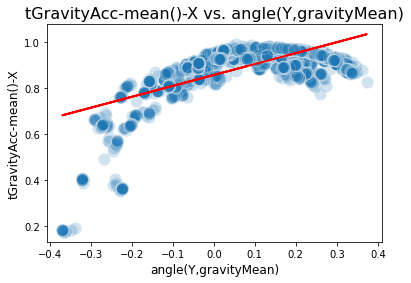

In [87]:
sns.scatterplot(x = ind_var1, y = dep_var, data = X_train_stat , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_train_stat[ind_var1], slope*X_train_stat[[ind_var1]] + intercept, color = 'r', linewidth = 2)
plt.title('tGravityAcc-mean()-X vs. angle(Y,gravityMean)', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var1, fontsize = 12)
plt.savefig('linear regression parabolica.pdf', bbox_inches = 'tight')

Text(0.5, 0, 'angle(Y,gravityMean)')

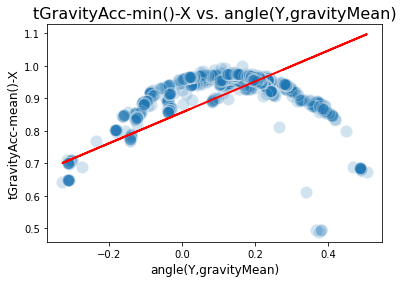

In [51]:
sns.scatterplot(x = ind_var1, y = dep_var, data = X_test_stat , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_test_stat[ind_var1], slope*X_test_stat[[ind_var1]] + intercept, color = 'r', linewidth = 2)
plt.title('tGravityAcc-min()-X vs. angle(Y,gravityMean)', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var1, fontsize = 12)

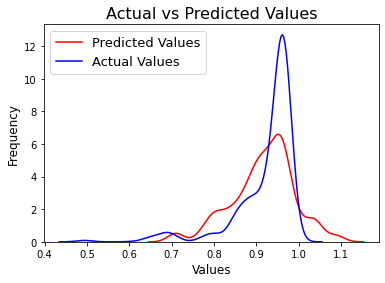

In [86]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred1, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_dep_test_var, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('actual vs predicted.pdf', bbox_inches = 'tight')

I valori compresi tra 0.65 e 1.2 vengono predetti meno volte di quanto realmente appaiono nella distribuzione.

In [53]:
print('Mean Absolute Error:', mean_absolute_error(y_dep_test_var, y_pred1))  
print('Mean Squared Error:', mean_squared_error(y_dep_test_var, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_dep_test_var, y_pred1)))

Mean Absolute Error: 0.06205001147879642
Mean Squared Error: 0.008661812708652412
Root Mean Squared Error: 0.09306886003735305


### Dynamic 

<AxesSubplot:>

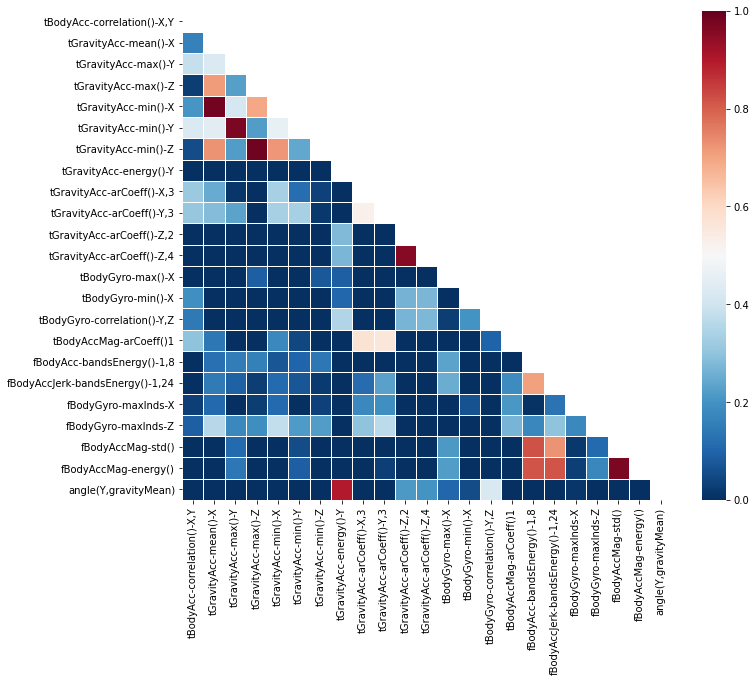

In [54]:
corr = X_train_dynam.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=0, vmax=1, 
            square=True, linewidths=.5)

In [55]:
#y_dep_var_dy= X_train_dynam['tGravityAcc-mean()-X']
x_ind_var1_dy= X_train_dynam['angle(Y,gravityMean)']    #correlazione 0
y_dep_var_dy

76      0.945303
77      0.941113
78      0.946364
79      0.952445
80      0.947125
          ...   
7269    0.923148
7270    0.918343
7271    0.919810
7272    0.922323
7273    0.918707
Name: tGravityAcc-mean()-X, Length: 3246, dtype: float64

Text(0.5, 0, 'angle(Y,gravityMean)')

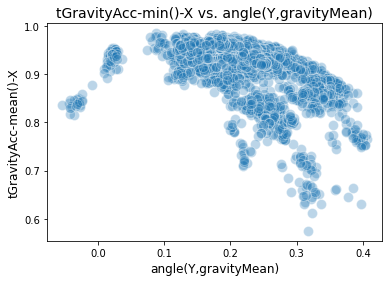

In [56]:
plt.scatter(y = dep_var, x = ind_var1, data = X_train_dynam, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('tGravityAcc-min()-X vs. angle(Y,gravityMean)', fontsize = 14)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var1, fontsize = 12)

In [57]:
model1_dy = sm.OLS(y_dep_var_dy,x_ind_var1_dy)   #sul training
model_reg1_dy = model1_dy.fit()

print(cl(model_reg1_dy.summary(),attrs = ['bold']) )

NameError: name 'cl' is not defined

sklearn

In [ ]:
#y_dep_test_var_dy= X_test_dynam['tGravityAcc-mean()-X']
x_ind_test1_dy= X_test_dynam['angle(Y,gravityMean)']


In [58]:
lr1 = LinearRegression()
lr1.fit(np.array(x_ind_var1_dy).reshape(-1,1),np.array(y_dep_var_dy).reshape(-1,1))
#y_pred1 = lr.predict(np.array(y_dep_test_var).reshape(-1,1))

LinearRegression()

In [59]:
r_sq1 = lr1.score(np.array(x_ind_var1_dy).reshape(-1,1), np.array(y_dep_var_dy).reshape(-1,1))
print('coefficient of determination - R^2:', r_sq1)
intercept1= lr1.intercept_
print('intercept:', lr1.intercept_)   #la retta incrocia l'asse y
slope1= lr1.coef_
print('slope:', lr1.coef_)  #pendenza della retta di regressione stimata

coefficient of determination - R^2: 0.20028366796704422
intercept: [0.99488127]
slope: [[-0.35625611]]


In [60]:
y_pred1_dy = lr1.predict(np.array(x_ind_test1_dy).reshape(-1,1))

NameError: name 'x_ind_test1_dy' is not defined

In [61]:
#y_dep_test_var_dy= X_test_dynam['tGravityAcc-mean()-X']
x_ind_test1_dy= X_test_dynam['angle(Y,gravityMean)']

In [62]:
#Evaluations
print("***Cross Validation R2 score - Training Data***")
get_cv_scores(lr1, np.array(x_ind_var1_dy).reshape(-1,1), np.array(y_dep_var_dy).reshape(-1,1)) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_dep_test_var_dy, y_pred1_dy))
print('MSE: %.3f' % mean_squared_error(y_dep_test_var_dy, y_pred1_dy))
print('MAE: %.3f' % mean_absolute_error(y_dep_test_var_dy, y_pred1_dy))

***Cross Validation R2 score - Training Data***
(R2):  -0.12843010739101376
STD:  0.10545032034969486


***Scores (no cv) on Test Data***


NameError: name 'y_dep_test_var_dy' is not defined

Text(0.5, 0, 'angle(Y,gravityMean)')

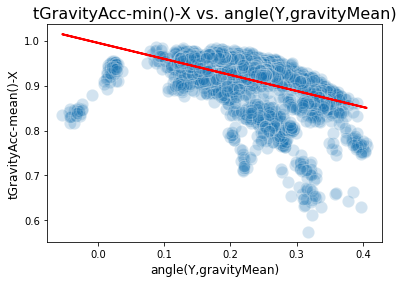

In [63]:
sns.scatterplot(x = ind_var1, y = dep_var, data = X_train_dynam , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_train_dynam[ind_var1], slope1*X_train_dynam[[ind_var1]] + intercept1, color = 'r', linewidth = 2)
plt.title('tGravityAcc-min()-X vs. angle(Y,gravityMean)', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var1, fontsize = 12)

In [64]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred1_dy, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_dep_test_var_dy, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

NameError: name 'y_pred1_dy' is not defined

## other variable

In [65]:
ind_var2= 'tGravityAcc-arCoeff()-X,3'

In [66]:
#y_dep_var= X_train_stat['tGravityAcc-mean()-X']
x_ind_var2= X_train_stat['tGravityAcc-arCoeff()-X,3']
x_ind_var2

0      -0.591773
1      -0.417567
2      -0.056728
3      -0.085823
4      -0.280665
          ...   
7147   -0.348531
7148   -0.532945
7149   -0.500731
7150   -0.328488
7151   -0.391767
Name: tGravityAcc-arCoeff()-X,3, Length: 2650, dtype: float64

In [67]:
mod = sm.OLS(y_dep_var,x_ind_var2)
mod_reg1 = mod.fit()

print(cl(mod_reg1.summary(),attrs = ['bold']) )

NameError: name 'cl' is not defined

Text(0.5, 0, 'tGravityAcc-arCoeff()-X,3')

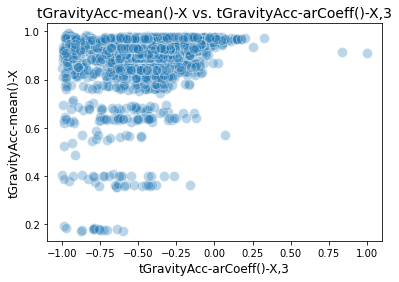

In [68]:
plt.scatter(y = dep_var, x = ind_var2, data = X_train_stat, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('tGravityAcc-mean()-X vs. tGravityAcc-arCoeff()-X,3', fontsize = 14)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var2, fontsize = 12)

In [69]:
#y_dep_test_var_dy= X_test_stat['tGravityAcc-mean()-X']
x_ind_test2= X_test_stat['tGravityAcc-arCoeff()-X,3']

In [70]:
lr2 = LinearRegression()
lr2.fit(np.array(x_ind_var2).reshape(-1,1),np.array(y_dep_var).reshape(-1,1))
#y_pred1 = lr.predict(np.array(y_dep_test_var).reshape(-1,1))

LinearRegression()

In [71]:
np.array(x_ind_var2).reshape(-1)

array([-0.59177346, -0.41756716, -0.05672816, ..., -0.50073074,
       -0.32848821, -0.39176712])

In [72]:
r_sq2 = lr2.score(np.array(x_ind_var2).reshape(-1,1), np.array(y_dep_var).reshape(-1))
print('coefficient of determination - R^2:', r_sq2)
intercept2= lr2.intercept_
print('intercept:', lr2.intercept_)   #la retta incrocia l'asse y
slope2= lr2.coef_
print('slope:', lr2.coef_)  #pendenza della retta di regressione stimata

coefficient of determination - R^2: 0.06590386245244972
intercept: [0.96731257]
slope: [[0.13086314]]


In [73]:
y_pred2 = lr2.predict(np.array(x_ind_test2).reshape(-1,1))

In [74]:
#Evaluations
print("***Cross Validation R2 score - Training Data***")
get_cv_scores(lr2, np.array(x_ind_var2).reshape(-1,1), np.array(y_dep_var).reshape(-1,1)) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_dep_test_var, y_pred2))
print('MSE: %.3f' % mean_squared_error(y_dep_test_var, y_pred2))
print('MAE: %.3f' % mean_absolute_error(y_dep_test_var,y_pred2))

***Cross Validation R2 score - Training Data***
(R2):  0.012392456833910992
STD:  0.07442817563428517


***Scores (no cv) on Test Data***
R2: -0.052
MSE: 0.006
MAE: 0.054


Text(0.5, 0, 'tGravityAcc-arCoeff()-X,3')

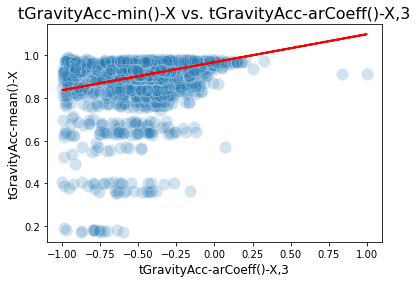

In [75]:
sns.scatterplot(x = ind_var2, y = dep_var, data = X_train_stat , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_train_stat[ind_var2], slope2*X_train_stat[[ind_var2]] + intercept2, color = 'r', linewidth = 2)
plt.title('tGravityAcc-min()-X vs. tGravityAcc-arCoeff()-X,3', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var2, fontsize = 12)

Dynamic

In [76]:
#y_dep_var_dy= X_train_dynam['tGravityAcc-mean()-X']
x_ind_var2_dy= X_train_dynam['tGravityAcc-arCoeff()-X,3']    

Text(0.5, 0, 'tGravityAcc-arCoeff()-X,3')

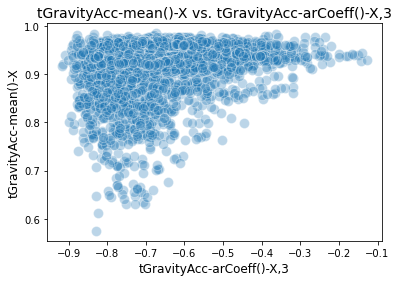

In [77]:
plt.scatter(y = dep_var, x = ind_var2, data = X_train_dynam, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('tGravityAcc-mean()-X vs. tGravityAcc-arCoeff()-X,3', fontsize = 14)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var2, fontsize = 12)

In [78]:
model2_dy = sm.OLS(y_dep_var_dy,x_ind_var2_dy)   #sul training
model_reg2_dy = model2_dy.fit()

print(cl(model_reg2_dy.summary(),attrs = ['bold']) )

NameError: name 'cl' is not defined

In [79]:
#y_dep_test_var_dy= X_test_dynam['tGravityAcc-mean()-X']
x_ind_test2_dy= X_test_dynam['tGravityAcc-arCoeff()-X,3']

In [80]:
lrdy = LinearRegression()
lrdy.fit(np.array(x_ind_var2_dy).reshape(-1,1),np.array(y_dep_var_dy).reshape(-1,1))
#y_pred1 = lr.predict(np.array(y_dep_test_var).reshape(-1,1))

LinearRegression()

In [81]:
r_sq_dy = lrdy.score(np.array(x_ind_var2_dy).reshape(-1,1), np.array(y_dep_var_dy).reshape(-1,1))
print('coefficient of determination - R^2:', r_sq_dy)
intercept2dy= lrdy.intercept_
print('intercept:', lrdy.intercept_)   #la retta incrocia l'asse y
slope2dy= lrdy.coef_
print('slope:', lrdy.coef_)  #pendenza della retta di regressione stimata

coefficient of determination - R^2: 0.062445371364959756
intercept: [0.98377457]
slope: [[0.10761389]]


In [82]:
y_pred2_dy = lrdy.predict(np.array(x_ind_test2_dy).reshape(-1,1))

In [83]:
print("***Cross Validation R2 score - Training Data***")
get_cv_scores(lrdy, np.array(x_ind_var2_dy).reshape(-1,1), np.array(y_dep_var_dy).reshape(-1,1)) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_dep_test_var_dy, y_pred2_dy))
print('MSE: %.3f' % mean_squared_error(y_dep_test_var_dy, y_pred2_dy))
print('MAE: %.3f' % mean_absolute_error(y_dep_test_var_dy, y_pred2_dy))

***Cross Validation R2 score - Training Data***
(R2):  -0.3868463508620903
STD:  0.34717273405100796


***Scores (no cv) on Test Data***


NameError: name 'y_dep_test_var_dy' is not defined

In [ ]:
sns.scatterplot(x = ind_var2, y = dep_var, data = X_train_dynam , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot( X_train_dynam[ind_var2], slope2dy*X_train_dynam[[ind_var2]] + intercept2dy, color = 'r', linewidth = 2)
plt.title('tGravityAcc-mean()-X vs. tGravityAcc-arCoeff()-X,3', fontsize = 16)
plt.ylabel(dep_var, fontsize = 12)
plt.xlabel(ind_var2, fontsize = 12)